<a href="https://colab.research.google.com/github/Georgia-MAX-holic/Footprints/blob/main/PJ/rainbowSIX/new/R6_new.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 기본 

- install category_encoders
- google.colab import drive
- import pandas as pd 
- plt 
- seaborn
- df_operators
- df_objectives

- 데이터셋 :

 https://www.ubisoft.com/en-ca/game/rainbow-six/siege/news-updates/2fQ8bGRr6SlS7B4u5jpVt1/introduction-to-the-data-peek-velvet-shell-statistics

In [ ]:
!pip install category_encoders

from google.colab import drive
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

drive.mount('/content/gdrive', force_remount=True)
pathA = '/content/gdrive/MyDrive/cpding/S5_operators.csv'
pathB = '/content/gdrive/MyDrive/cpding/S5_objectives.csv'
df_operators = pd.read_csv(pathA , sep=";")
df_objectives = pd.read_csv(pathB , sep=";")



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Mounted at /content/gdrive


In [ ]:
df_operators.head()

,platform,dateid,skillrank,role,operator,primaryweapon,secondaryweapon,secondarygadget,nbwins,nbkills,nbdeaths,nbpicks
0,PC,20170210,Bronze,Attacker,BOPE-CAPITAO,M249,PRB92,CLAYMORE,6,6,6,8
1,PC,20170210,Bronze,Attacker,BOPE-CAPITAO,M249,PRB92,STUN GRENADE,4,2,6,8
2,PC,20170210,Bronze,Attacker,BOPE-CAPITAO,PARA-308,PRB92,CLAYMORE,37,40,49,70
3,PC,20170210,Bronze,Attacker,BOPE-CAPITAO,PARA-308,PRB92,STUN GRENADE,17,24,31,41
4,PC,20170210,Bronze,Attacker,G.E.O.-JACKAL,C7E,ITA12S,BREACH CHARGE,74,123,127,174


In [ ]:
df_objectives.head()

,platform,dateid,gamemode,mapname,objectivelocation,skillrank,role,operator,nbwins,nbkills,nbdeaths,nbpicks
0,PC,20170210,PvP . BOMB,BANK,EXECUTIVE LOUNGE / CEO OFFICE,Bronze,Attacker,G.E.O.-JACKAL,0,0,1,1
1,PC,20170210,PvP . BOMB,BANK,EXECUTIVE LOUNGE / CEO OFFICE,Bronze,Attacker,GIGN-MONTAGNE,1,0,2,3
2,PC,20170210,PvP . BOMB,BANK,EXECUTIVE LOUNGE / CEO OFFICE,Bronze,Attacker,GSG9-IQ,0,0,1,1
3,PC,20170210,PvP . BOMB,BANK,EXECUTIVE LOUNGE / CEO OFFICE,Bronze,Attacker,JTF2-BUCK,0,0,1,1
4,PC,20170210,PvP . BOMB,BANK,EXECUTIVE LOUNGE / CEO OFFICE,Bronze,Attacker,SAS-THATCHER,0,0,1,1


# 기본 전처리 

앞으로 있을 분석들을 위하여 KDA와 승률을 계산한다 

In [ ]:
df_operators["k/d_ratio"]= df_operators["nbkills"]/df_operators["nbdeaths"]
df_operators["win_ratio"]= df_operators["nbwins"]/df_operators["nbpicks"]

df_objectives["k/d_ratio"]= df_objectives["nbkills"]/df_objectives["nbdeaths"]
df_objectives["win_ratio"]= df_objectives["nbwins"]/df_objectives["nbpicks"]


0데스 , 매치중 한번도 안죽은 플레이어는 KDA가 집계되지 않아 데이터로 이용할 수 없다. 그렇기에 제거 

In [ ]:
INDEX_oper   = df_operators[df_operators["nbdeaths"]==0].index
df_operators = df_operators.drop(INDEX_oper)

INDEX_obj   = df_objectives[df_objectives["nbdeaths"]==0].index
df_objectives = df_objectives.drop(INDEX_obj)

print(df_operators.isnull().sum())
print(df_objectives.isnull().sum())

platform           0
dateid             0
skillrank          0
role               0
operator           0
primaryweapon      0
secondaryweapon    0
secondarygadget    0
nbwins             0
nbkills            0
nbdeaths           0
nbpicks            0
k/d_ratio          0
win_ratio          0
dtype: int64
platform             0
dateid               0
gamemode             0
mapname              0
objectivelocation    0
skillrank            0
role                 0
operator             0
nbwins               0
nbkills              0
nbdeaths             0
nbpicks              0
k/d_ratio            0
win_ratio            0
dtype: int64


# 공/수 오퍼레이터들 데이터 시각화

-  결측치 없음 

- 우선 나온 데이터들을 픽률, 승률 기준으로 시각화를 시켜보자, 값이 높을수록 현재 쓰기 좋은 오퍼레이터라고 볼 수 있다 .

- 이를 위해서는 필요한 데이터 ( operator , win_ratio, nbpicks)만 남기고 전부 잘라내야하고  operator 를 기준으로 승률과 픽률을 평균해서 정렬해야한다 .


## Code

In [ ]:
df_ATK = df_operators[df_operators["role"]=="Attacker"][["operator","win_ratio","k/d_ratio","nbpicks"]]
df_DEF = df_operators[df_operators["role"]=="Defender"][["operator","win_ratio","k/d_ratio","nbpicks"]]

- 전체 데이터로 시각화를 한번 해봤는데 오퍼레이터 숫자가 너무 많아 보기가 힘들었다.

- 공격 , 수비 오퍼레이터로 분리해서 시각화 

In [ ]:
df_graph_ATK=df_ATK.groupby(['operator'], as_index=False).mean()
df_graph_DEF=df_DEF.groupby(['operator'], as_index=False).mean()

## 그래프

-  데이터 그대로의 픽률과 승률을 시각화 한것 

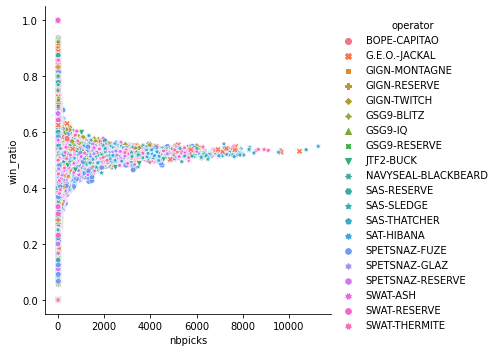

In [ ]:
sns.relplot(x="nbpicks", y="win_ratio", hue="operator", style= "operator" , data=df_ATK)
plt.show()

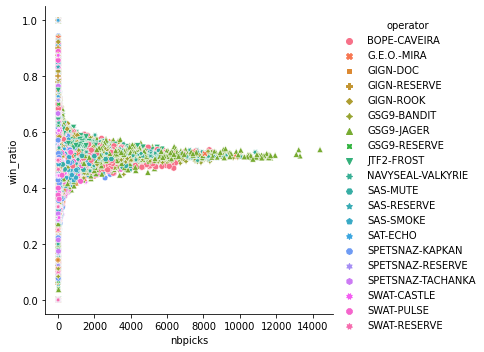

In [ ]:

sns.relplot(x="nbpicks", y="win_ratio", hue="operator", style= "operator" , data=df_DEF)
plt.show()

데이터들은 평균 승률 0.5로 모여있음 , 랭크가 올라갈수록 승리하기 어렵기 때문 

win/ picks 그래프 

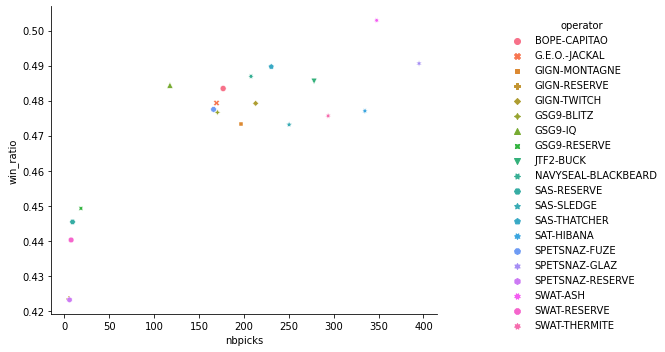

In [ ]:
sns.relplot(x="nbpicks", y="win_ratio", hue="operator", style= "operator" , data=df_graph_ATK).fig.set_size_inches(10,5)
plt.show()

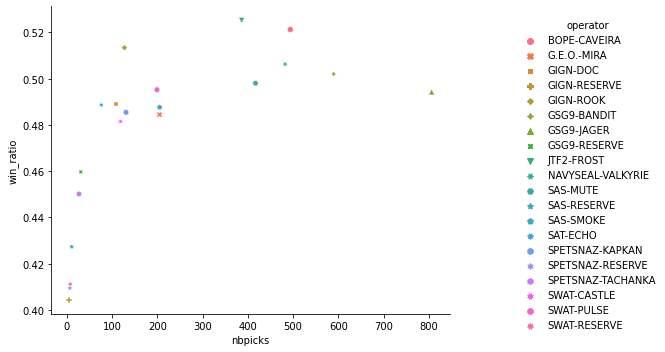

In [ ]:

sns.relplot(x="nbpicks", y="win_ratio", hue="operator", style= "operator" , data=df_graph_DEF).fig.set_size_inches(10,5)
plt.show()
 # 승률 그래프 

- 공격 
   - 가장 승률이 높은것은 ASH 

   - 픽률이 많은것은 GLAZ 
  
   - 두 오퍼레이터들 모두 엔트리( 선두진입 ) 역할을 맡는 오퍼레이터들로, 말하자면 캐리하기 좋다. 
- 수비
   - 수비팀 승률이 가장 높은것은 FROST와 CAVEIRA

     - 이때 버그가 있어서 FROST의 샷건의 모든 펠릿이 한번음 모여서 날아갔음

     - FROST 특수장비인 덫을 한번 밟는순간 전세가 기울어버린다

   - 픽률이 가장 높은것은 JAGER 

   - JAGER와 CAVEIRA는 로머 (거점 밖에서 기습하는것)로 캐리하기 좋은 캐릭터임과 동시에 무장과 특수장비의 성능이 우월함, 둘 다 너프가 필요할것으로 보임


   - RESERVE ( 예비군 ) 들을 제외하고는 TACHANKA가 승률과 픽률이 가장 떨어짐 , 상향이 시급한 캐릭터다

KDA/ WIN 그래프 

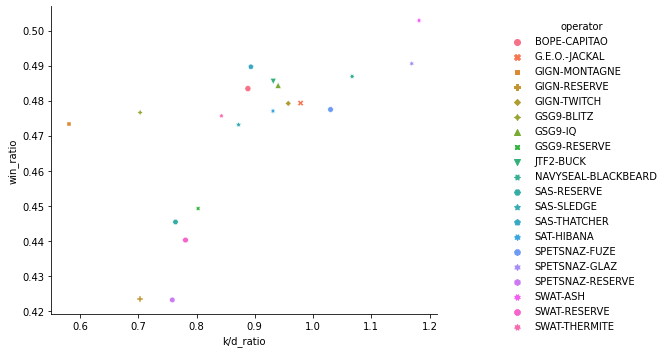

In [ ]:
sns.relplot(x="k/d_ratio", y="win_ratio", hue="operator", style= "operator" , data=df_graph_ATK).fig.set_size_inches(10,5)
plt.show()


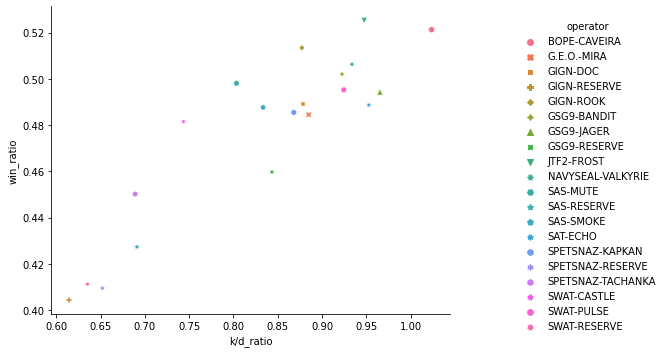

In [ ]:
sns.relplot(x="k/d_ratio", y="win_ratio", hue="operator", style= "operator" , data=df_graph_DEF).fig.set_size_inches(10,5)
plt.show()


- KDA / Win_ratio  , 밸런스패치를할때 참고하는 형태의 그래프라고 한다. 

- 공격 
   - 가장 좋은 오퍼레이터는 ASH ,GLAZ 순 
   
   - 성능이 가장 떨어지는 오퍼레이터는 CAPITAO  
      (RESERVE, 예비병력들 사이에 끼어 있다) 

- 수비 
   - 가장 좋은 오퍼레이터는 CAVEIRA , FROST 

   - 역시나 TACHANKA는 안쓰러운 성능을 보여준다. 


- CAVEIRA는 난이도 최상위인것을 제외하면 (게임 내부의 캐릭터 설명: 난이도 최상) 

- 초보자 추천 캐릭터는 
   - 예거 발키리 밴딧 프로스트 
 
   - 애쉬 글라즈 슬렛지 퓨즈



# 이상치 탐색 ( 불법 프로그램 / 스머프 )

이상치 검색부터 진행, 데이터셋은 밸뱃쉘 시즌의 랭크 데이터고 실제 플레이한 데이터이다. 즉 여기서 이상치가 발견된다면 , 불법프로그램 유저 혹은 스머프 (양학러)일 가능성이 높다

 IQR 사용 

- 말하자면 불법프로그램과 스머프 유저들의 데이터일 확률이 높음 

- 가장 승률이 높은것은 RESERVE ( 예비군 )들 , 기본캐릭터이기 떄문에 핵 실컷 즐기다가 정지당한것으로 보인다. 

- 이상치: 일반적인 값보다 상대적으로 큰 데이터 즉 전체 데이터 패턴에서 동떨어져 있는 관측치 , 평균에 영향을 많이 끼치기에 처리해야 하는 데이터

## Code

In [ ]:
def outlier_ATK(target):
   q1=df_ATK[target].quantile(0.25)
   q2=df_ATK[target].quantile(0.5)
   q3=df_ATK[target].quantile(0.75)
   iqr=q3-q1
   condition=df_ATK[target]>q3+1.5*iqr
   df_outlier_ATK=df_ATK[condition].dropna()
   return df_outlier_ATK
   
def outlier_DEF(target):
   q1=df_DEF[target].quantile(0.25)
   q2=df_DEF[target].quantile(0.5)
   q3=df_DEF[target].quantile(0.75)
   iqr=q3-q1
   condition=df_DEF[target]>q3+1.5*iqr
   df_outlier_DEF=df_DEF[condition].dropna()
   return df_outlier_DEF

def graph_ATK():
   df_graph_ATK=(df_outlier_ATK[["operator","win_ratio","k/d_ratio","nbpicks"]]
       .sort_values(by="win_ratio" ,ascending=False)
       .groupby(['operator'], as_index=False).mean())
   return df_graph_ATK

def graph_DEF():
   df_graph_DEF=(df_outlier_DEF[["operator","win_ratio","k/d_ratio","nbpicks"]]
       .sort_values(by="win_ratio" ,ascending=False)
       .groupby(['operator'], as_index=False).mean())
   return df_graph_DEF

def except_outlier_ATK():
   df_graph_ATK=(df_ATK[["operator","win_ratio","k/d_ratio","nbpicks"]]
       .sort_values(by="win_ratio" ,ascending=False)
       .groupby(['operator'], as_index=False).mean())
   return df_graph_ATK

def except_outlier_DEF():
   df_graph_DEF=(df_DEF[["operator","win_ratio","k/d_ratio","nbpicks"]]
       .sort_values(by="win_ratio" ,ascending=False)
       .groupby(['operator'], as_index=False).mean())
   return df_graph_DEF

df_outlier_ATK = outlier_ATK("win_ratio")
df_outlier_DEF = outlier_DEF("win_ratio")

df_outlier_ATK_kda = outlier_ATK("k/d_ratio")
df_outlier_DEF_kda = outlier_DEF("k/d_ratio")

df_operators_drop_ATK = df_operators[df_operators["role"]=="Attacker"].drop(df_outlier_ATK.index, axis=0)
df_operators_drop_DEF = df_operators[df_operators["role"]=="Defender"].drop(df_outlier_DEF.index, axis=0)

weapone_ATK = df_operators_drop_ATK.copy()
weapone_DEF = df_operators_drop_DEF.copy()

df_ATK = df_ATK.drop(df_outlier_ATK.index, axis=0)
df_DEF = df_DEF.drop(df_outlier_DEF.index, axis=0)

## 그래프 (이상치)

- RESERVE( 예비군)이 승리의 화신이 되었다.

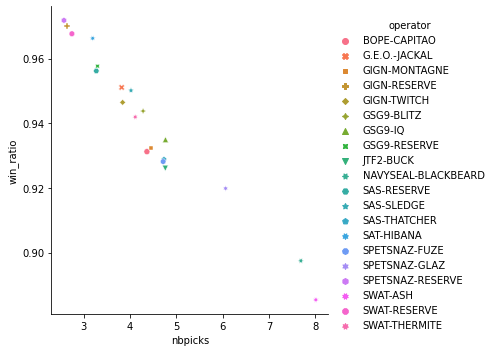

In [ ]:
sns.relplot(x="nbpicks", y="win_ratio", hue="operator", style= "operator" , data=graph_ATK())
plt.show()

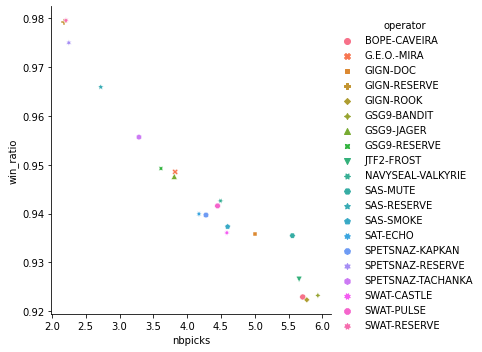

In [ ]:

sns.relplot(x="nbpicks", y="win_ratio", hue="operator", style= "operator" , data=graph_DEF())
plt.show()

- 예비군의 승률이 대부분 1.0 언저리에 있다.

- 특이사항으로는 픽률이 10판조차 못넘겼다는것인데,

 핵 사용자는 정지를 당하고, 양학하던 유저는 랭크가 올라버려 양학을 하지 못하기 때문이라 추측

- 가장 저렴한 패키지를 구매하여 (예비군만 언락되어있던걸로 기억함) 핵으로 실컷 즐기고 도망가는것으로 보인다.  

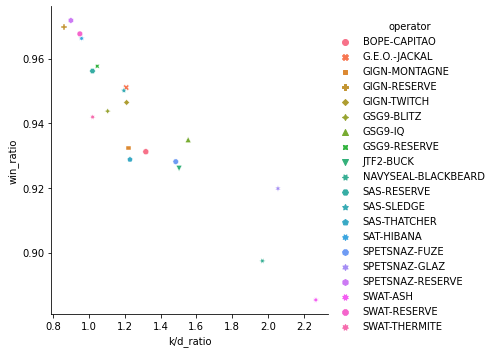

In [ ]:
sns.relplot(x="k/d_ratio", y="win_ratio", hue="operator", style= "operator" , data=graph_ATK())
plt.show()

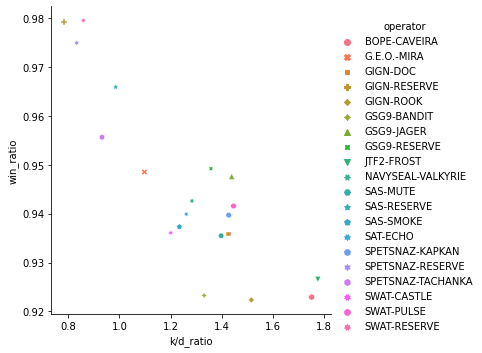

In [ ]:

sns.relplot(x="k/d_ratio", y="win_ratio", hue="operator", style= "operator" , data=graph_DEF())
plt.show()

- 전체 그래프에서 종합적으로 최하위를 기록하던 예비군들이 승률 최상위권을 기록하고 있다. 대부분 승률 1.0에 수렴하고 있다

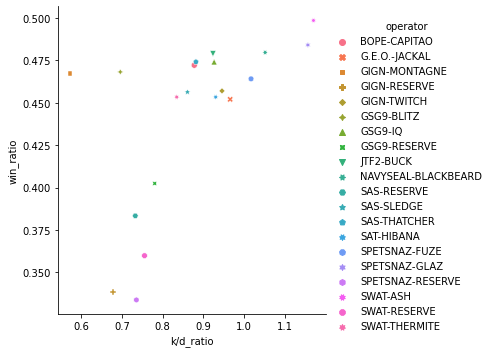

In [ ]:
sns.relplot(x="k/d_ratio", y="win_ratio", hue="operator", style= "operator" , data=except_outlier_ATK())
plt.show()

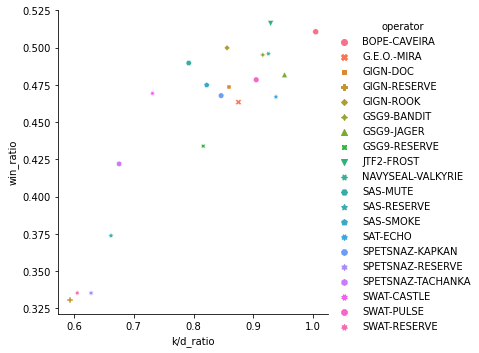

In [ ]:

sns.relplot(x="k/d_ratio", y="win_ratio", hue="operator", style= "operator" , data=except_outlier_DEF())
plt.show()

- 결측값을 제외한 데이터

- 이상치가 있고 없고에 따라 예비군 승률의 변화가 보임

- 예비군들은 좌측 하단에 분포되어있다(수비 GSG9 제외 , 무장이 JAGER와 동일하며 성능이 우월하다)  

# 공/수 무기별 KDA ,선호도

- 전체 유저의 무기 선호도 그리고 예측 KDA를 트리구조로 표현해볼생각이다.

- 수비팀은 SG의 성능이 제법 괜찮고 , 왠만해선 한팀에 하나는 챙겨가는 편이다, 

- 그러니 공격팀보다는 수비팀의 샷건 KDA가 좀더 높을것이다( 물론 다른 총기 대비 낮을것 ) 

## Code

In [ ]:
AR = ["PARA-308" , "C7E" , "416-C CARBINE" , "F2" ,"C8-SFW", "AUG A2", "552 COMMANDO","AR33" , "L85A2" , "G36C" , "AK-12" , "R4-C" , "556XI" ,"TYPE-89", "MK17 CQB"] 
SMG = ["PDW9" , "UMP45","MP5" ,"P90" , "9mm C1","VECTOR .45 ACP","9x19VSN" ,"FMG-9", "MP5SD" , "MPX", "MP7" , "M12","MP5K"]  
SG = ["SG-CQB","M1014" , "SASG-12" , "SuperNova" , "SPAS-12" , "M590A1","M870","ITA12L","SUPER 90","SPAS-15",""]
SR = ["HK417" , "C8-SFW"  , "CAMRS" ,"OTs-03","SR-25"]
LMG = ["M249", "G8A1" , "6P41"]

for ar  in AR :
  df_operators_drop_ATK = df_operators_drop_ATK.replace(ar , "AR")
  df_operators_drop_DEF = df_operators_drop_DEF.replace(ar , "AR")
for smg in SMG:
  df_operators_drop_ATK = df_operators_drop_ATK.replace(smg , "SMG")
  df_operators_drop_DEF = df_operators_drop_DEF.replace(smg , "SMG")
for sg in SG:
  df_operators_drop_ATK = df_operators_drop_ATK.replace(sg , "SG")
  df_operators_drop_DEF = df_operators_drop_DEF.replace(sg , "SG")
for sr in SR:
  df_operators_drop_ATK = df_operators_drop_ATK.replace(sr , "SR")
  df_operators_drop_DEF = df_operators_drop_DEF.replace(sr , "SR")
for lmg in LMG:
  df_operators_drop_ATK = df_operators_drop_ATK.replace(lmg , "LMG")
  df_operators_drop_DEF = df_operators_drop_DEF.replace(lmg , "LMG")



In [ ]:
ATK_encoder_KD = df_operators_drop_ATK
ATK_encoder_WIN = df_operators_drop_ATK

DEF_encoder_KD = df_operators_drop_DEF
DEF_encoder_WIN = df_operators_drop_DEF

In [ ]:
from category_encoders import OneHotEncoder
from sklearn.tree import DecisionTreeRegressor

encoder_ATK = OneHotEncoder(use_cat_names= True)
encoder_DEF = OneHotEncoder(use_cat_names= True)

ATK_encoder_KD = encoder_ATK.fit_transform(ATK_encoder_KD)
DEF_encoder_KD = encoder_DEF.fit_transform(DEF_encoder_KD)


결정트리로 각 무기별 KDA를 시각화 하여 한눈에 보고싶다. 

회귀나무 (regression tree)로 진행


In [ ]:
import graphviz
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor,export_graphviz
from sklearn.metrics import accuracy_score
weapon_list_ATK = ["primaryweapon_LMG", "primaryweapon_AR" ,"primaryweapon_SMG","primaryweapon_Shield","primaryweapon_SR","primaryweapon_SG"]
weapon_list_DEF = ["primaryweapon_AR" ,"primaryweapon_SMG","primaryweapon_SG"]

In [ ]:
def DTR_ATK(target):
  tree_reg_ATK = DecisionTreeRegressor()

  col_ATK = ATK_encoder_KD[weapon_list_ATK]

  target = ATK_encoder_KD[[target]]

  X_train , X_test , y_train, y_test = train_test_split(col_ATK , target , test_size = 0.2 , random_state=11)
  tree_reg_ATK.fit(X_train, y_train)
  y_pred=tree_reg_ATK.predict(X_test)
  accur=tree_reg_ATK.score(X_test,y_pred)

  return print(accur)


def DTR_DEF(target):
  tree_reg_DEF = DecisionTreeRegressor()

  col_DEF = DEF_encoder_KD[weapon_list_DEF]

  target = DEF_encoder_KD[[target]]

  X_train , X_test , y_train, y_test = train_test_split(col_DEF , target , test_size = 0.2 , random_state=11)
  tree_reg_DEF.fit(X_train, y_train)

  y_pred=tree_reg_DEF.predict(X_test)
  accur=tree_reg_DEF.score(X_test,y_pred)
  return print(accur)

def show_tree(tree, colnames):
    dot = export_graphviz(tree, feature_names=colnames, filled=True, rounded=True)   
    return graphviz.Source(dot)


In [ ]:
DTR_ATK("k/d_ratio")
DTR_DEF("k/d_ratio")
DTR_ATK("win_ratio")
DTR_DEF("win_ratio")

1.0
1.0
1.0
1.0


In [ ]:
def TREE_ATK(target):
  col_ATK = ATK_encoder_KD[ATK_encoder_KD.columns]
  target_ATK = ATK_encoder_KD[target]
  tree_ATK = DecisionTreeRegressor()
  tree_ATK.fit(col_ATK[weapon_list_ATK], target_ATK)

  return tree_ATK

def TREE_DEF(target):
  col_DEF = DEF_encoder_KD[DEF_encoder_KD.columns]
  target_DEF = DEF_encoder_KD[[target]]
  tree_DEF = DecisionTreeRegressor()
  tree_DEF.fit(col_DEF[weapon_list_DEF], target_DEF)

  return tree_DEF


## 그래프

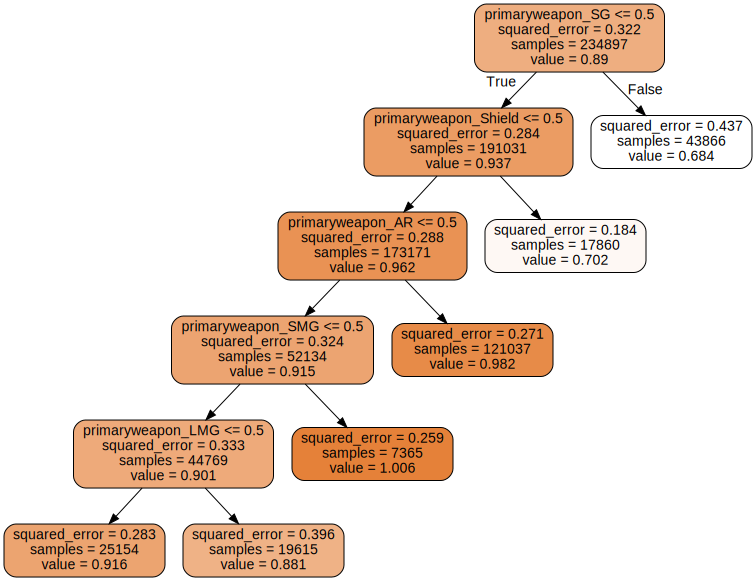

In [ ]:
show_tree(TREE_ATK("k/d_ratio"), colnames=weapon_list_ATK)

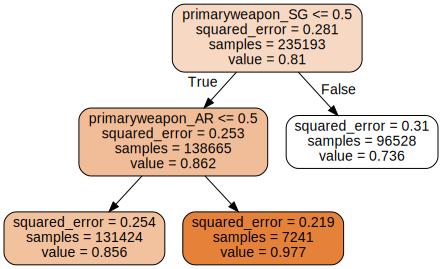

In [ ]:
show_tree(TREE_DEF("k/d_ratio"), colnames=weapon_list_DEF)

- 단순히 해당 무기를 들고 갔을때 실전에서 어느정도의 KDA를 기록할지 확인할 수 있다. 

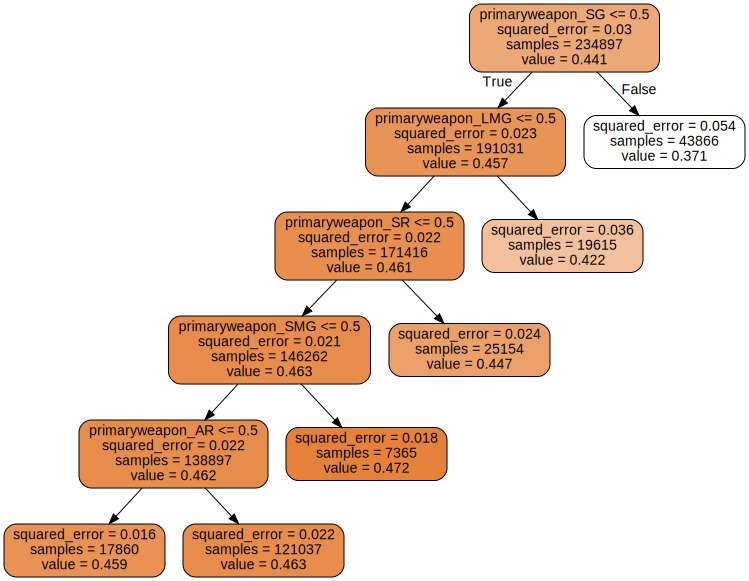

In [ ]:
show_tree(TREE_ATK("win_ratio"), colnames=weapon_list_ATK)

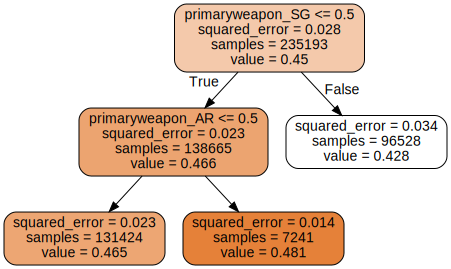

In [ ]:
show_tree(TREE_DEF("win_ratio"), colnames=weapon_list_DEF)

승률에 따른 회귀트리 

# 플랫폼별 승률, KDA 차이 


1. 콘솔로 플레이하는 사람들은 선호하는 무기가 다를까? 

2. 만약 선호하는 무기가 다르고, 각 캐릭터별 주력 총기가 다르다면, 밸런스 패치를 다르게 진행해야한다

3. 머리한번만 쏘면 죽는 게임이니 PC는 SMG와 AR이 지배하고 있다.
 하지만 조준이 어려운 콘솔은 샷건의 선호도가 좀 더 높지 않을까 싶다  



## 플랫폼별 KDA , Win_ratio

In [ ]:
print("DEF_K/DA",df_operators_drop_DEF[["platform","k/d_ratio"]].groupby("platform").mean())
print()
print("ATK_K/DA",df_operators_drop_ATK[["platform","k/d_ratio"]].groupby("platform").mean())

DEF_K/DA           k/d_ratio
platform           
PC         0.845214
PS4        0.794322
XONE       0.798116

ATK_K/DA           k/d_ratio
platform           
PC         0.858801
PS4        0.901558
XONE       0.903808


In [ ]:
print("DEF_win", df_operators_drop_DEF[["platform","win_ratio"]].groupby("platform").mean())
print()
print("ATK_win", df_operators_drop_ATK[["platform","win_ratio"]].groupby("platform").mean())

DEF_win           win_ratio
platform           
PC         0.449866
PS4        0.450440
XONE       0.450463

ATK_win           win_ratio
platform           
PC         0.400803
PS4        0.459416
XONE       0.453613


- 콘솔에서는 평균적으로 공격팀의 평균 KDA가 더 높음, 교전시 공격팀이 더욱 유리한것을 볼수 있음

- 콘솔 승률은 서로 비슷하며 최종적으로 공수 밸런스는 맞다고 볼 수 있음 

-  PC의 승률은 차이가 있는데 이는 수비팀이 공격팀보다 유리하다는것을 의미함 

- 콘솔의 경우 헤드샷을 노리기 어려워 서로 화력싸움을 하는 비율이 높기에 수비팀보다 공격팀의 KDA가 높은듯 하다. 

## Code

In [ ]:
df_operators_drop_ATK = df_operators_drop_ATK.replace("PS4" , "CONSOLE").replace("XONE","CONSOLE")
df_operators_drop_DEF = df_operators_drop_DEF.replace("PS4" , "CONSOLE").replace("XONE","CONSOLE")

In [ ]:
def TREE_ATK(target):
  col_ATK = ATK_encoder_KD[ATK_encoder_KD.columns]
  target_ATK = ATK_encoder_KD["win_ratio"]
  tree_ATK = DecisionTreeRegressor()
  tree_ATK.fit(col_ATK[weapon_list_ATK], target_ATK)

  return tree_ATK


In [ ]:
weapone_ATK=weapone_ATK.replace("XONE","CONSOLE")
weapone_ATK=weapone_ATK.replace("PS4","CONSOLE")

weapone_DEF=weapone_DEF.replace("XONE","CONSOLE")
weapone_DEF=weapone_DEF.replace("PS4","CONSOLE")

In [ ]:
PC_ATK = weapone_ATK[weapone_ATK["platform"]=="PC"]
CONSOLE_ATK = weapone_ATK[(weapone_ATK["platform"]=="CONSOLE") ]

PC_DEF = weapone_DEF[weapone_DEF["platform"]=="PC"]
CONSOLE_DEF = weapone_DEF[(weapone_DEF["platform"]=="CONSOLE") ]

In [ ]:
def weapon_chart_PC_ATK(target ,x, y):
    weapone_ATK_PC= PC_ATK.groupby("primaryweapon").mean().sort_values(by=target)
    plt.figure(figsize=(x,y))

    return sns.barplot(x=weapone_ATK_PC[target], y=weapone_ATK_PC.index, data=weapone_ATK_PC).set_title("PC_ATK")

def weapon_chart_PC_DEF(target, x, y):
    weapone_DEF_PC= PC_DEF.groupby("primaryweapon").mean().sort_values(by=target)
    plt.figure(figsize=(x,y))

    return sns.barplot(x=weapone_DEF_PC[target], y=weapone_DEF_PC.index, data=weapone_DEF_PC).set_title("PC_DEF")

def weapon_chart_CON_ATK(target,x,y):
    weapone_ATK_CON= CONSOLE_ATK.groupby("primaryweapon").mean().sort_values(by=target)
    plt.figure(figsize=(x,y))

    return sns.barplot(x=weapone_ATK_CON[target], y=weapone_ATK_CON.index, data=weapone_ATK_CON).set_title("CON_ATK")

def weapon_chart_CON_DEF(target, x, y):
    weapone_DEF_CON= CONSOLE_DEF.groupby("primaryweapon").mean().sort_values(by=target)
    plt.figure(figsize=(x,y))

    return sns.barplot(x=weapone_DEF_CON[target], y=weapone_DEF_CON.index, data=weapone_DEF_CON).set_title("CON_DEF")

## 그래프

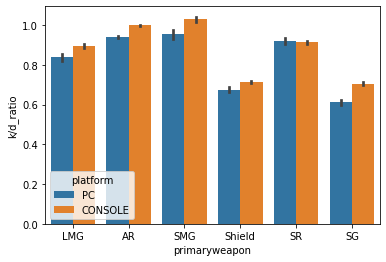

In [ ]:
sns.barplot(data=df_operators_drop_ATK,
            x="primaryweapon",
            y="k/d_ratio",
            hue="platform")

- 콘솔은 헤드샷을 맞추기 어렵다. 

    (PC가 콘솔보다 유리한건 일반적인 현상이다. 조이스틱으로 정조준하기 힘들기 때문) 

- 샷건이 KDA차이가 꽤 심하게 난다. 그리고 전체적으로 콘솔의 KDA가 높게 나왔다. 


- 공격팀의 무장은 몇몇 오퍼레이터들을 제외하곤 화력으로 압도할수 있다. 그렇기에 PC의 경우 SMG를 이용해 헤드샷을 노려 화력차팀를 이겨낸것으로 보인다.

-  콘솔유저들은 헤드샷을 잘 맞추지 못한다. 그렇기에 헤드샷을 맞기 전에 샷건으로 사살하였기 때문에 콘솔의 샷건 K/DA 격차가 더 크게 벌어진듯 하다. 

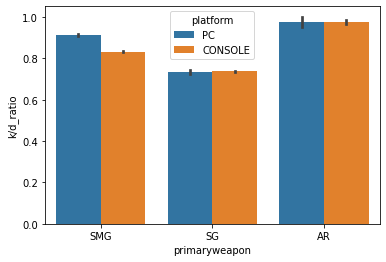

In [ ]:
sns.barplot(data=df_operators_drop_DEF,
            x="primaryweapon",
            y="k/d_ratio",
            hue="platform")

- 수비팀& PC 의 SMG K/DA 격차가 벌어져있음

- PC & CONSOLE의 SMG KDA가 차이나는것을 보아 PC의 SMG 사용자는 공격팀과 마찬가지로 헤드샷노려 화력차이를 이겨낸것으로 보인다

Text(0.5, 1.0, 'PC_ATK')

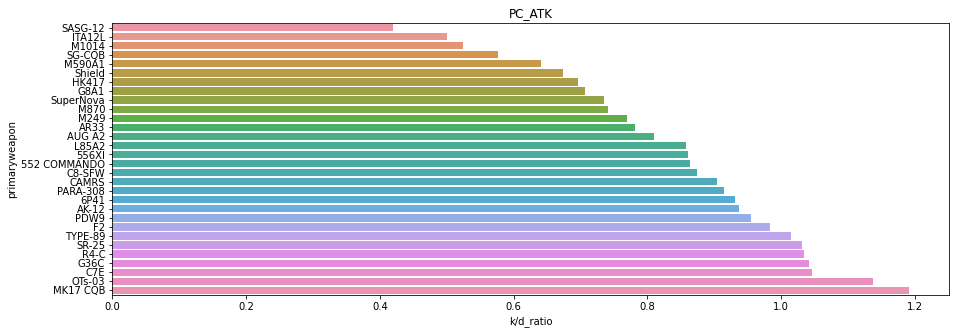

In [ ]:
weapon_chart_PC_ATK("k/d_ratio",15,5)

Text(0.5, 1.0, 'CON_ATK')

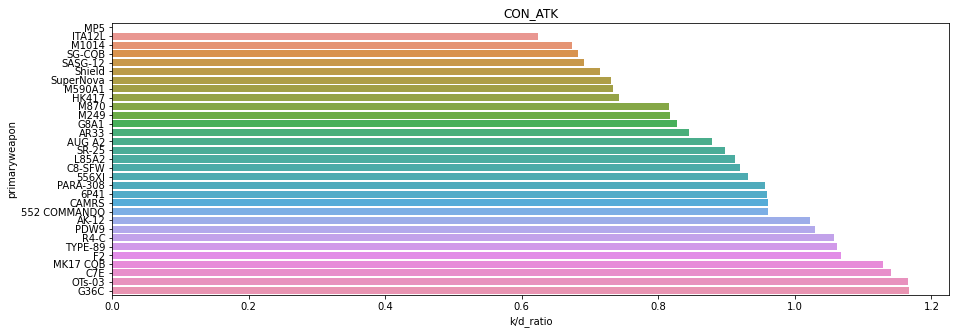

In [ ]:
weapon_chart_CON_ATK("k/d_ratio",15,5)

Text(0.5, 1.0, 'PC_DEF')

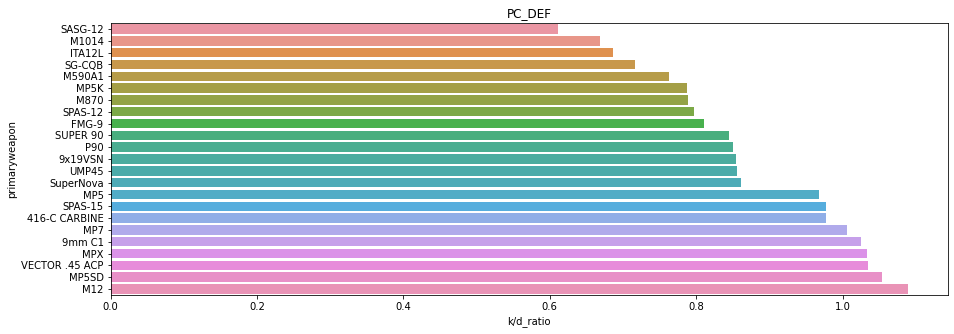

In [ ]:
weapon_chart_PC_DEF("k/d_ratio",15,5)

Text(0.5, 1.0, 'CON_DEF')

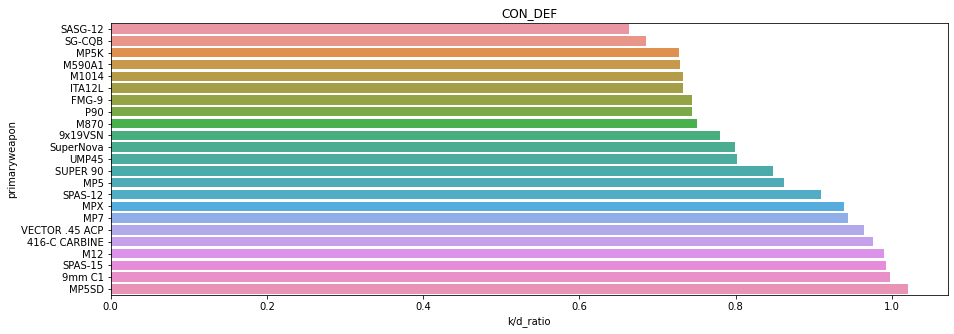

In [ ]:
weapon_chart_CON_DEF("k/d_ratio",15,5)

- 이 시즌때 FROST의 샷건인 SUPER 90 에는 버그가 있었다고 한다. 

 샷건 펠릿이 한곳에 모여서 날아가는 버그였다고 하는데 굉장히 강력했다고 한다.

 하지만 실질적으로 큰 킬 결정능력은 많이 부족했던것으로 보인다.



- 콘솔의 최고의 킬 결정능력을 가지고 있는 무기는 G36C , PC는 MK17 CQB 

 MK17 CQB는 BLACK BEARD 오퍼레이터의 무장으로 BLACK BEARD는 머리를 보호하는 총기방패를 특수장비로 가지고 있다. 

 헤드샷을 노리는 PC 환경에서는 굉장히 강력한 성능을 발휘하나, 그것이 어려운 콘솔 환경에서는 살짝 밀리는 모습을 보여준다. 
 

Text(0.5, 1.0, 'PC_ATK')

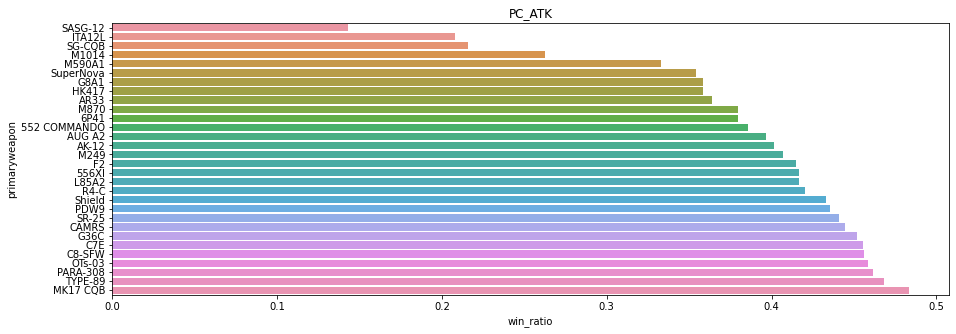

In [ ]:
weapon_chart_PC_ATK("win_ratio",15,5)

Text(0.5, 1.0, 'CON_ATK')

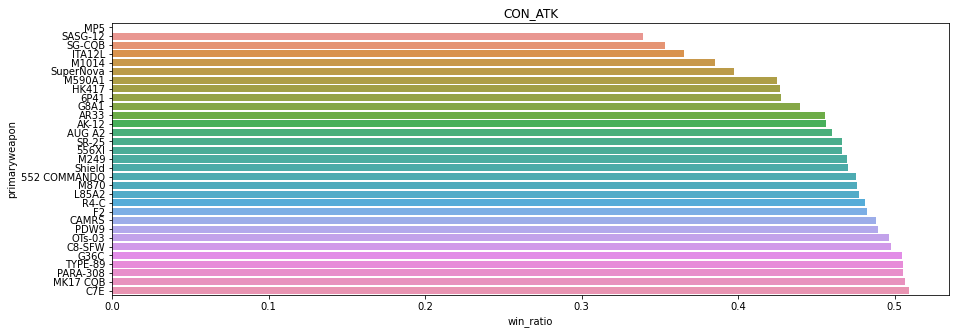

In [ ]:
weapon_chart_CON_ATK("win_ratio",15,5)

Text(0.5, 1.0, 'PC_DEF')

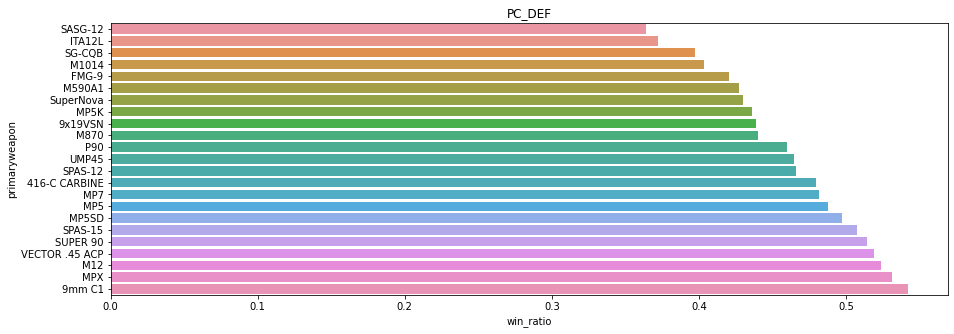

In [ ]:
weapon_chart_PC_DEF("win_ratio",15,5)

Text(0.5, 1.0, 'CON_DEF')

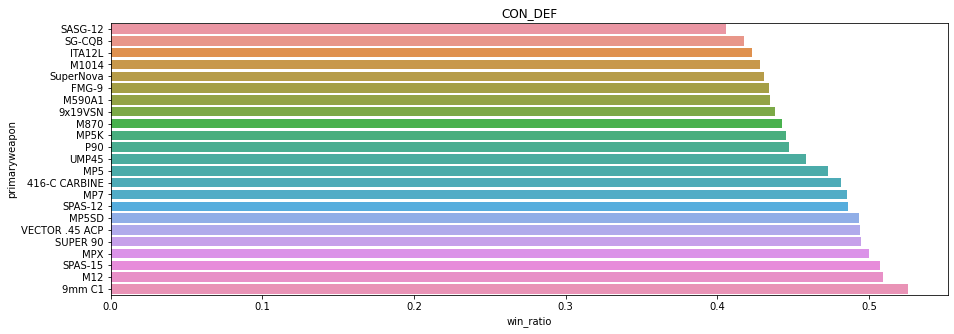

In [ ]:
weapon_chart_CON_DEF("win_ratio",15,5)

- 다른 샷건은 안좋은 순위를 기록하고 있으나 SUPER 90 이라는 샷건은 최상위권을 기록하였다. 하지만 위에서 본 그래프를 보면 킬 결정능력은 부족하였다. 즉 샷건을 이용해서 승리를 거뒀다기 보다는, 특수장비인 곰덫의 영향이 큰것으로 보인다.

# 맵별 공수 승률

- 여기 플랫폼은 전부 PC뿐이다

## Code 

In [ ]:
INDEX_obj    = df_objectives[df_objectives["nbdeaths"]==0].index
df_objectives= df_objectives.drop(INDEX_obj)

In [ ]:
objectives_BOMB = df_objectives[df_objectives["gamemode"]=="PvP . BOMB"]

In [ ]:
objectives_BOMB=objectives_BOMB[["mapname","objectivelocation","skillrank","role","operator","k/d_ratio","win_ratio"]].sort_values(by="win_ratio")


In [ ]:
def map_graph(target_x, target_y , HUE , DATA):  
   plt.figure(figsize=(6,6))
   return sns.barplot(data=DATA,
                y=target_y,
                x=target_x,
                hue=HUE)

## 그래프

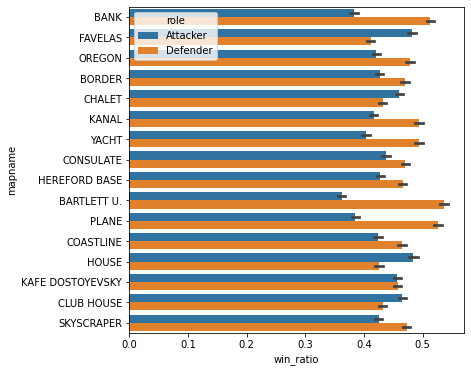

In [ ]:
map_graph("win_ratio","mapname","role",objectives_BOMB)

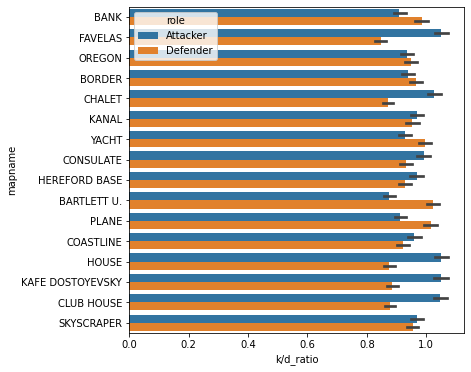

In [ ]:
map_graph("k/d_ratio","mapname","role",objectives_BOMB)

- 공격팀이 KDA가 더 높더라도 승률은 수비팀과 비슷하거나 수비팀이 더 높다.

- 단순히 킬을 많이 하더라도 승리로 이어지는것은 아니라는것을 알 수 있음 

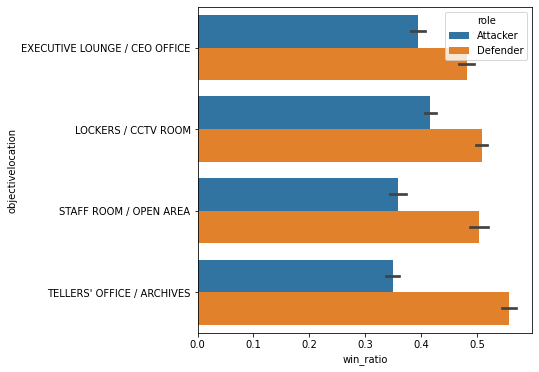

In [ ]:
MAP_LIST=objectives_BOMB[objectives_BOMB["mapname"].isin(["BANK"])]
map_graph("win_ratio","objectivelocation","role",MAP_LIST) 

- BANK    
   - EXECUTIVE LOUNGE / CEO OFFICE = 2층 
   - LOCKERS / CCTV ROOM  = 지하
   - STAFF ROOM / OPEN AREA  1층
   - TELLERS OFFICE 1층 


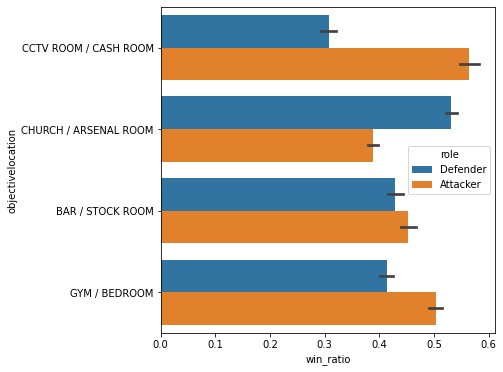

In [ ]:
MAP_LIST=objectives_BOMB[objectives_BOMB["mapname"].isin(['CLUB HOUSE'])]
map_graph("win_ratio","objectivelocation","role",MAP_LIST) 


- CLUB HOUST 
   - GYM / BEDROOM  2층  : 
   - CHRUCH / ARSENAL ROOM 지하 
   - CCTV ROOM / CASH ROOM 2층
   - BAR / STOCK ROOM  1층 

- 맵 전체적으로 수정할 필요가 있음 

- 특히 2층은 압도적으로 공격팀이 더 유리함 공격팀이 불리하게 수정할 필요가 있어보임 

- 지하는 수비팀이 더 유리한데 , 지하라는 특성상 진입 가능한 루트가 한정되어 있음 , 그렇기에 버티컬 역할을 수행하는 오퍼레이터 ( SLEDGE, BUCK)을 상향하거나, 천장 해치를 늘리는 방법이 있음 

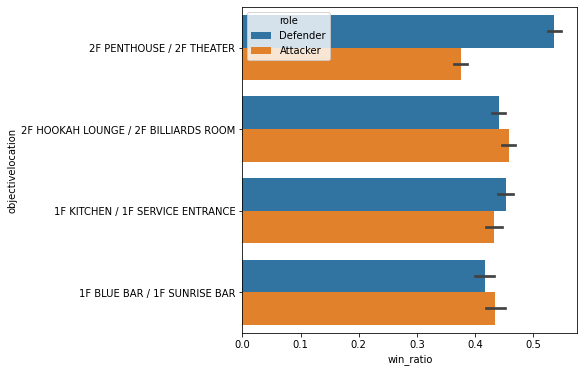

In [ ]:
MAP_LIST=objectives_BOMB[objectives_BOMB["mapname"].isin(["COASTLINE"])]
map_graph("win_ratio","objectivelocation","role",MAP_LIST)

- 밸런스가 잘 잡힌 맵, 2층 팬트하우스를 제외하고는 비슷한 승률을 보여주고 있음, 

- 밸런스를 맞추기 위해서는 1층은 그대로 두고 2층만 손보는것이 좋아보임

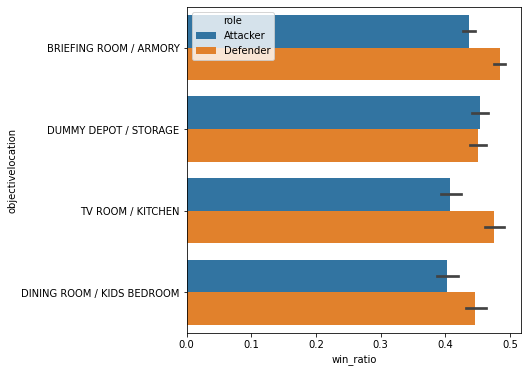

In [ ]:
MAP_LIST=objectives_BOMB[objectives_BOMB["mapname"].isin(["HEREFORD BASE"])]
map_graph("win_ratio","objectivelocation","role",MAP_LIST)

- COASTLINE
   - HOOKAH LOUNGE / 2F BILLIARDS ROOM  2층
   - PENTHOUSE/ THEATHER 2층 
   - KITCHEN / SERVICE ENTRANCE 
   - 1F BLUE BAR /1F SUNRISE BAR 1층 

# 불법프로그램 사용자, 스머프 추정 유저 분리 

## Code 

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
import time
import warnings

df_outlier_ATK["hax"]=1
df_ATK["hax"]=0

df_rfs=pd.concat([df_outlier_ATK,df_ATK])

features = df_rfs[["win_ratio", "k/d_ratio","nbpicks"]]
target = df_rfs["hax"]

X_train, X_test, y_train, y_test = train_test_split(features, target , test_size = 0.3 , random_state=11)

In [ ]:
start_time = time.time()
gb = GradientBoostingClassifier(random_state=0)
gb.fit(X_train, y_train)
pred = gb.predict(X_test)
gb_accuracy = accuracy_score(y_test,pred)

## Socre

In [ ]:
gb

GradientBoostingClassifier(random_state=0)

In [ ]:
gb_accuracy

1.0

일단 잘 맞춘다.

- 사실상 스머프는 잡기 힘들다. 그냥 잘하는데 못올라가는 경우도 있으니, 이건 운영적인 부분으로 잡아야한다 . (부계정을 못만들게 한다던가) 

- 유저의 이상이 감지된 데이터가 많아지면 많아질수록 좀 더 주의깊게 본다거나. 

- 이상이 발견된 데이터들을 우선적으로 처리하여 불법프로그램 이용자를 좀 더 빠르게 색출이 가능할것 같음 .

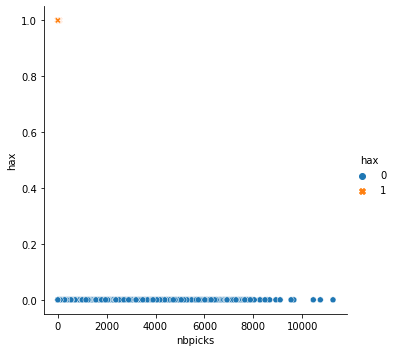

In [ ]:
sns.relplot(x="nbpicks", y="hax", hue="hax", style= "hax" , data=df_rfs)

- 이상치 발견된 데이터는 게임을 오래 못하는것을 볼 수 있다. 

- 즉 핵 유저는 정지를 당해서 플레이가 중단되거나, 양학을 하는 유저는 랭크가 올라 양학을 하지 못하는것으로 보인다.

- 불법프로그램을 판별할때 picks도 사용 가능한것으로 보임 